In [27]:
import pandas as pd
from scapy.all import rdpcap
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Read PCAP file using Scapy
def readPCAP(pcapFile):
    packets = rdpcap(pcapFile)

    # packets[5].show()
    # Extract packet information
    packet_data = []
    for packet in packets:
        if 'IP' in packet:
            ip_layer = packet['IP']
            transport_layer = packet[ip_layer.payload.name]

            # Calculate payload size
            payload_size = len(packet) - len(ip_layer) - len(transport_layer)

            packet_info = {
                'Source IP': ip_layer.src,
                'Destination IP': ip_layer.dst,
                'Protocol': ip_layer.payload.name,
                'Source Port': transport_layer.sport if hasattr(transport_layer, 'sport') else None,
                'Destination Port': transport_layer.dport if hasattr(transport_layer, 'dport') else None,
                'Timestamp': packet.time,
                'Packet Size': len(packet),
                'Payload Size': payload_size
            }
            packet_data.append(packet_info)
            
    # Convert to Pandas DataFrame
    df = pd.DataFrame(packet_data)

    # Drop rows with NaN or None values
    df_cleaned = df.dropna()

    return df_cleaned

In [29]:
def plotIAT(df):
    # display(df['Interarrival'])

    # Plot the interarrival times
    plt.plot(df.index, df['Interarrival'], marker='o')
    plt.xlabel('Packet Number')
    plt.ylabel('Interarrival Time')
    plt.title('Interarrival Times of Packets')
    plt.grid(True)
    plt.show()

In [30]:
def plotTemporalPosition(df):
    # Visualize packets arrival over time
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Timestamp'], range(
        len(df)), label='Packets', color='blue')
    plt.xlabel('Timestamp')
    plt.ylabel('Packet Index')
    plt.title('Packets Arrival Over Time')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [31]:
rdpData1 = "data/pcap/rdp-data/capture4.pcapng"
rdpData2 = "data/pcap/rdp-data/capture5-use.pcapng"

df = readPCAP(rdpData1)

# Sort the dataframe by 'Timestamp' column
df.sort_values(by='Timestamp', inplace=True)

# Calculate interarrival times
df['Interarrival'] = df['Timestamp'].diff().fillna(0)
df['Interarrival-ms'] = df['Timestamp'].diff().fillna(0) * 1000

df

###[ Ethernet ]### 
  dst       = 08:00:27:70:82:67
  src       = 08:00:27:25:65:b4
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 71
     id        = 17958
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = tcp
     chksum    = 0x6f35
     src       = 192.168.2.3
     dst       = 192.168.2.2
     \options   \
###[ TCP ]### 
        sport     = ms_wbt_server
        dport     = 40246
        seq       = 537282535
        ack       = 1637058904
        dataofs   = 8
        reserved  = 0
        flags     = PA
        window    = 509
        chksum    = 0x858f
        urgptr    = 0
        options   = [('NOP', None), ('NOP', None), ('Timestamp', (3181938394, 2011125901))]
###[ Raw ]### 
           load      = '\x03\x00\x00\x13\x0e\\xd0\x00\x00\x124\x00\x02\x01\x08\x00\x01\x00\x00\x00'



,Source IP,Destination IP,Protocol,Source Port,Destination Port,Timestamp,Packet Size,Interarrival,Interarrival-ms
0,192.168.2.2,192.168.2.3,TCP,40246,3389,1715739869.701568486,74,0,0
1,192.168.2.3,192.168.2.2,TCP,3389,40246,1715739869.701589144,74,0.000020658,0.020658000
2,192.168.2.2,192.168.2.3,TCP,40246,3389,1715739869.701911889,66,0.000322745,0.322745000
3,192.168.2.2,192.168.2.3,TCP,40246,3389,1715739869.701911945,85,5.6E-8,0.000056000
4,192.168.2.3,192.168.2.2,TCP,3389,40246,1715739869.701933299,66,0.000021354,0.021354000
...,...,...,...,...,...,...,...,...,...
934,192.168.2.2,192.168.2.3,TCP,40246,3389,1715739885.883519972,66,4.48E-7,0.000448000
935,192.168.2.3,192.168.2.2,TCP,3389,40246,1715739885.883854145,90,0.000334173,0.334173000
936,192.168.2.3,192.168.2.2,TCP,3389,40246,1715739885.883942035,66,0.000087890,0.087890000
937,192.168.2.2,192.168.2.3,TCP,40246,3389,1715739885.884675443,60,0.000733408,0.733408000


In [32]:
df1 = readPCAP(rdpData2)

# Sort the dataframe by 'Timestamp' column
df1.sort_values(by='Timestamp', inplace=True)

# Calculate interarrival times
df1['Interarrival'] = df1['Timestamp'].diff().fillna(0)
df1['Interarrival-ms'] = df1['Timestamp'].diff().fillna(0) * 1000

df1

###[ Ethernet ]### 
  dst       = 08:00:27:70:82:67
  src       = 08:00:27:25:65:b4
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 71
     id        = 48840
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = tcp
     chksum    = 0xf692
     src       = 192.168.2.3
     dst       = 192.168.2.2
     \options   \
###[ TCP ]### 
        sport     = ms_wbt_server
        dport     = 59402
        seq       = 3048422276
        ack       = 785668916
        dataofs   = 8
        reserved  = 0
        flags     = PA
        window    = 509
        chksum    = 0x858f
        urgptr    = 0
        options   = [('NOP', None), ('NOP', None), ('Timestamp', (3182432020, 2011619379))]
###[ Raw ]### 
           load      = '\x03\x00\x00\x13\x0e\\xd0\x00\x00\x124\x00\x02\x01\x08\x00\x01\x00\x00\x00'



,Source IP,Destination IP,Protocol,Source Port,Destination Port,Timestamp,Packet Size,Interarrival,Interarrival-ms
0,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740363.179901312,74,0,0
1,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740363.179942687,74,0.000041375,0.041375000
2,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740363.180209385,66,0.000266698,0.266698000
3,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740363.180920267,85,0.000710882,0.710882000
4,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740363.180925941,66,0.000005674,0.005674000
...,...,...,...,...,...,...,...,...,...
1383,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740375.813066509,66,0.000025388,0.025388000
1384,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740375.813247466,90,0.000180957,0.180957000
1385,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740375.813273342,66,0.000025876,0.025876000
1386,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740375.813551481,60,0.000278139,0.278139000


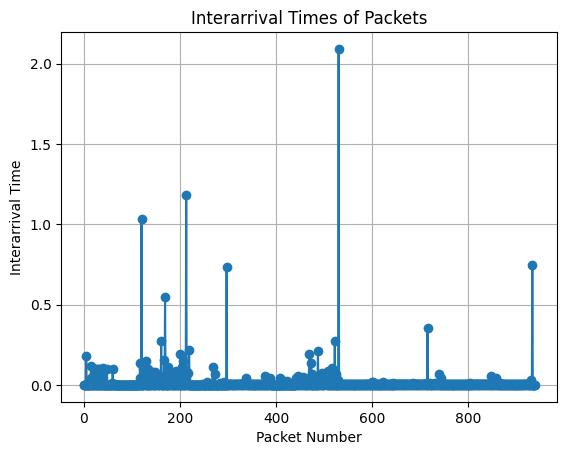

In [33]:
# 117 and 118
# 190 and 191

plotIAT(df)

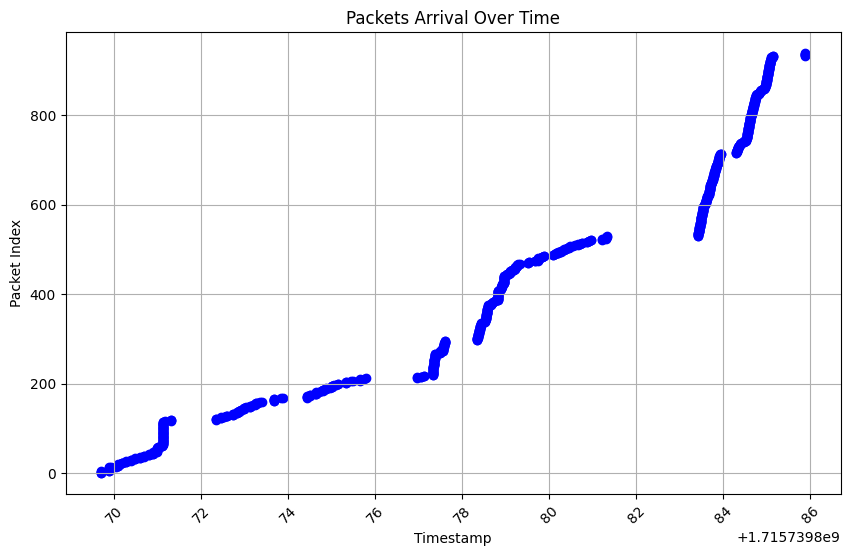

In [34]:
plotTemporalPosition(df)

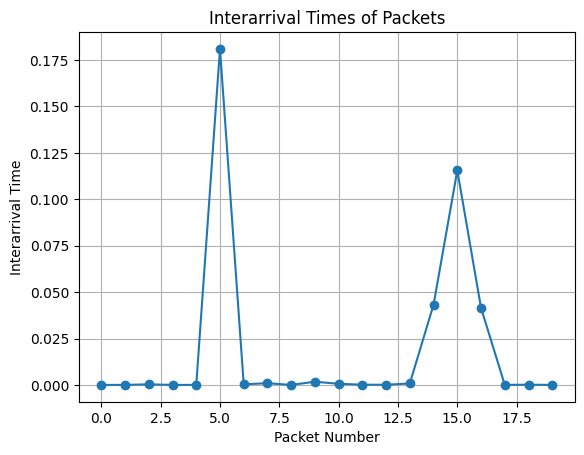

In [35]:
sliced_df = df.iloc[0:20]

plotIAT(sliced_df)

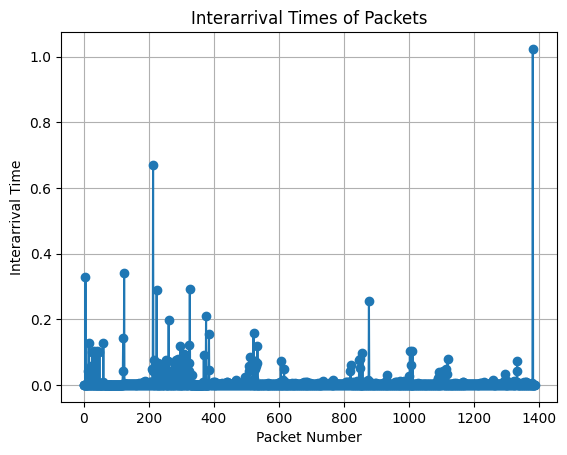

In [36]:
plotIAT(df1)

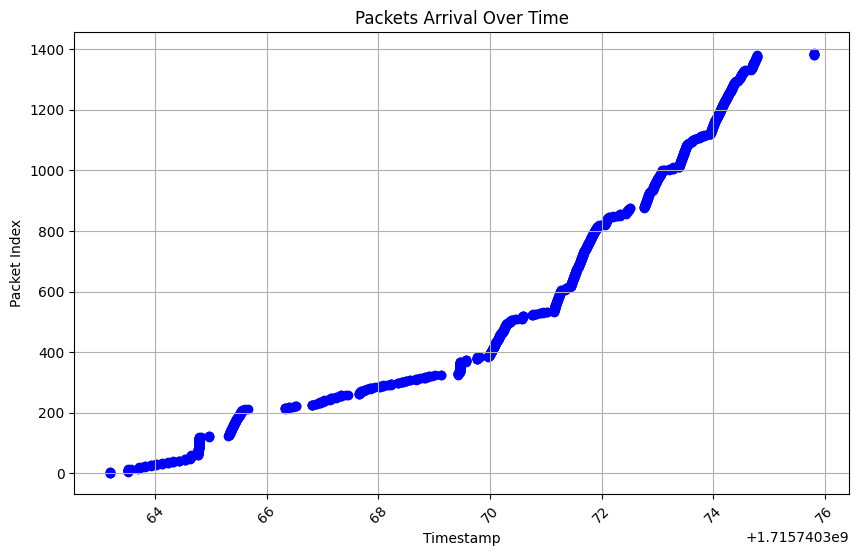

In [37]:
plotTemporalPosition(df1)

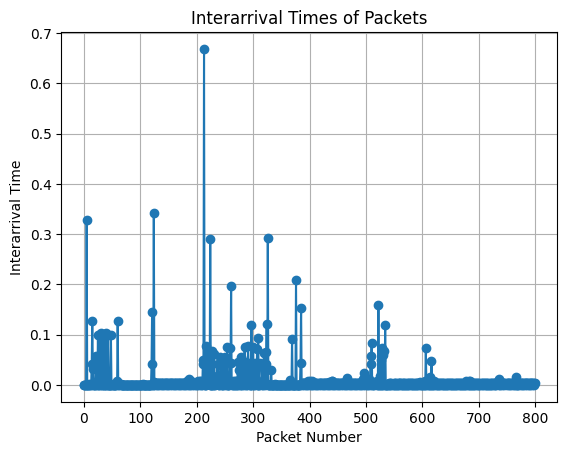

In [38]:
sliced_df1 = df1.iloc[0:800]
# 140:240

plotIAT(sliced_df1)

In [39]:
cleaned_df1 = df1[df1["Packet Size"] != 0].reset_index(drop=True)

display(df1)
display(cleaned_df1)

,Source IP,Destination IP,Protocol,Source Port,Destination Port,Timestamp,Packet Size,Interarrival,Interarrival-ms
0,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740363.179901312,74,0,0
1,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740363.179942687,74,0.000041375,0.041375000
2,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740363.180209385,66,0.000266698,0.266698000
3,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740363.180920267,85,0.000710882,0.710882000
4,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740363.180925941,66,0.000005674,0.005674000
...,...,...,...,...,...,...,...,...,...
1383,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740375.813066509,66,0.000025388,0.025388000
1384,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740375.813247466,90,0.000180957,0.180957000
1385,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740375.813273342,66,0.000025876,0.025876000
1386,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740375.813551481,60,0.000278139,0.278139000


,Source IP,Destination IP,Protocol,Source Port,Destination Port,Timestamp,Packet Size,Interarrival,Interarrival-ms
0,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740363.179901312,74,0,0
1,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740363.179942687,74,0.000041375,0.041375000
2,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740363.180209385,66,0.000266698,0.266698000
3,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740363.180920267,85,0.000710882,0.710882000
4,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740363.180925941,66,0.000005674,0.005674000
...,...,...,...,...,...,...,...,...,...
1383,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740375.813066509,66,0.000025388,0.025388000
1384,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740375.813247466,90,0.000180957,0.180957000
1385,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740375.813273342,66,0.000025876,0.025876000
1386,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740375.813551481,60,0.000278139,0.278139000
